<a href="https://colab.research.google.com/github/Nouran-Khallaf/NLP_Visualisation/blob/main/NoteBooks/4_Text_Summariser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summarizer Notebook

## Tutorial: Building a Text Summarizer

### Introduction
This notebook demonstrates how to build a text summarizer using the news dataset. We will use the text column for summarization and evaluate the results.

### 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

### 2. Load Data
Load your dataset into a DataFrame.

In [5]:
df = pd.read_csv('/content/BalancedArabicNewsDataset.csv')

# Check for null values
print(df.isnull().sum())

# Fill or drop null values
df['description'] = df['description'].fillna('')
df['date_publish'] = df['date_publish'].fillna('Unknown')

# Combine 'text' and 'description' columns for summarization
df['text'] = df['text'] + ' ' + df['description']
df = df[['date_publish', 'text']]
df.columns = ['date', 'content']

# Ensure no null contents
df = df[pd.notnull(df['content'])]

# Show a sample of the data
df.sample(5)

title               0
description      1049
date_download       0
date_publish      138
source_domain       0
url                 0
text                0
image_url           0
authors             0
title_page          0
dtype: int64


,date,content
79793,2017-12-25,Image caption العوامية نقطة احتجاجات ساخنة في ...
77453,2018-02-03,قال مسؤول سعودي لرويترز إن جميع المفرج عنهم مؤ...
71939,2016-05-25,مصدر الصورة AP Image caption كووك حصل على وسام...
5908,2010-08-18,وأشار إلى أن الكثير من الضحايا كانوا قد سقطوا ...
26382,2014-06-11,بغداد، العراق (CNN)—قال رئيس الوزراء العراقي، ...


### 3. Text Preprocessing\n
Tokenize and clean the text.

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    return sentences

df['sentences'] = df['content'].apply(preprocess_text)
df.sample(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,date,content,sentences
17291,2015-12-26,أتلانتا، الولايات المتحدة الأمريكية (CNN) -- أ...,[أتلانتا، الولايات المتحدة الأمريكية (CNN) -- ...
24397,2016-02-01,أتلانتا، الولايات المتحدة الأمريكية (CNN)-- أع...,[أتلانتا، الولايات المتحدة الأمريكية (CNN)-- أ...
34073,2017-07-23,خفت حدة القصف المدفعي والمعارك الدائرة في جرود...,[خفت حدة القصف المدفعي والمعارك الدائرة في جرو...
46727,2019-04-01,انتقدت مجموعة أوروبية تراقب الانتخابات المحلية...,[انتقدت مجموعة أوروبية تراقب الانتخابات المحلي...
65448,2015-04-08,مصدر الصورة Thinkstock\nعندما يتصل عميل بالمست...,[مصدر الصورة Thinkstock\nعندما يتصل عميل بالمس...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('content')):
  _plot_series(series, series_name, i)
  fig.legend(title='content', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['content'].value_counts()
    for x_label, grp in _df_4.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('content')

### 4. Summarization Function
Implement a simple text summarizer based on sentence extraction.

In [7]:
def summarize(text, num_sentences=3):
    stop_words = set(stopwords.words("arabic"))
    word_frequencies = {}

    for word in nltk.word_tokenize(text):
        if word not in stop_words:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word] / maximum_frequncy)

    sentence_scores = {}
    sentences = sent_tokenize(text)
    for sent in sentences:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]

    import heapq
    summary_sentences = heapq.nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

# Summarize a sample text
sample_text = df['content'].iloc[0]
print("Original Text:", sample_text)
print("Summary:", summarize(sample_text))

Original Text: لا تكاد هوليود تخلو من أفلام الرعب أبدا، صحيح أنها لا تحقق انتشارا على نطاق واسع مثل أفلام الأبطال الخارقين، لكنها تجد دائما مساحة لتطل منها من آن لآخر وسط العروض التقليدية.
ومن بين هذه النوعية من الأفلام، تستقبل دور العرض فيلم رعب من طراز خاص بعنوان "مكان هادئ" (أي كوايت بلايس)، يتناول قصة أسرة تلجأ إلى مكان هادئ لا يسمع فيه سوى صدى الصمت، تفاديا لأن تقع فريسة للوحوش التي تفترس بني البشر.
تلعب بطولة الفيلم النجمة البريطانية إيملي بلونت، مع زوجها جون كرازينسكي الذي يلعب دور زوجها في الفيلم أيضا، بالإضافة إلى أنه كاتب سيناريو العمل، وشارك في الإخراج مع كل من سكوت بيك، وبراين وودز المتخصص في أفلام الرعب، ومن أبرز أعماله "أضواء الليل" عام 2015.
والفيلم من توزيع شركة بارامونت، وهذا يعطيه دفعة قوية في دور العرض. وقد عرض لأول مرة في مهرجان "ساوث باي ساوث ويست" خلال مارس/آذار الماضي ولاقى استحسانا كبيرا من جانب الجمهور والنقاد على حد سواء لأسلوبه غير النمطي، رغم استخدام نفس حبكات وتفاصيل أفلام الرعب التقليدية.
ويُعدّ اختيار الشخصيات من بين أهم الاختلافات بين هذا العمل وأفلام ال

### 5. Apply Summarizer to Dataset

In [8]:
df['summary'] = df['content'].apply(lambda x: summarize(x, num_sentences=3))
df.sample(5)

,date,content,sentences,summary
10962,2012-03-21,الزلزال تسبب في قطع خدمات الهاتف والكهرباء وتص...,[الزلزال تسبب في قطع خدمات الهاتف والكهرباء وت...,وقال الرئيس المكسيكي فيليبي كالديرون على حسابه...
23350,2016-02-12,توفا: فيما مضى، كانت توفا دولة مستقلة، لكنها ا...,[توفا: فيما مضى، كانت توفا دولة مستقلة، لكنها ...,"وبحسب الموقع الإلكتروني لها، فهي ""دولة غير إقل..."
65055,2016-02-24,مصدر الصورة EPA Image caption صورة أرشيفية لهب...,[مصدر الصورة EPA Image caption صورة أرشيفية له...,"وكانت الطائرة، وهي من طراز ""توين أوتر"" وتابعة ..."
74697,2017-08-30,مصدر الصورة AFP Image caption انسحب مئات المقا...,[مصدر الصورة AFP Image caption انسحب مئات المق...,كما أثار الاتفاق جدلا في لبنان، إذ أعرب معارضو...
53387,2017-04-19,قام مارك غاسول لاعب فريق ممفيس غريزلس لكرة الس...,[قام مارك غاسول لاعب فريق ممفيس غريزلس لكرة ال...,


### 6. Save Summarized Data
Save the summarized data to a new CSV file.

In [9]:
output_file = '/summarized_data.csv'
df.to_csv(output_file, index=False)
print(f"Summarized data saved to {output_file}")

Summarized data saved to /summarized_data.csv


### 7. Visualize Results
Visualize the length of original texts vs. summaries.

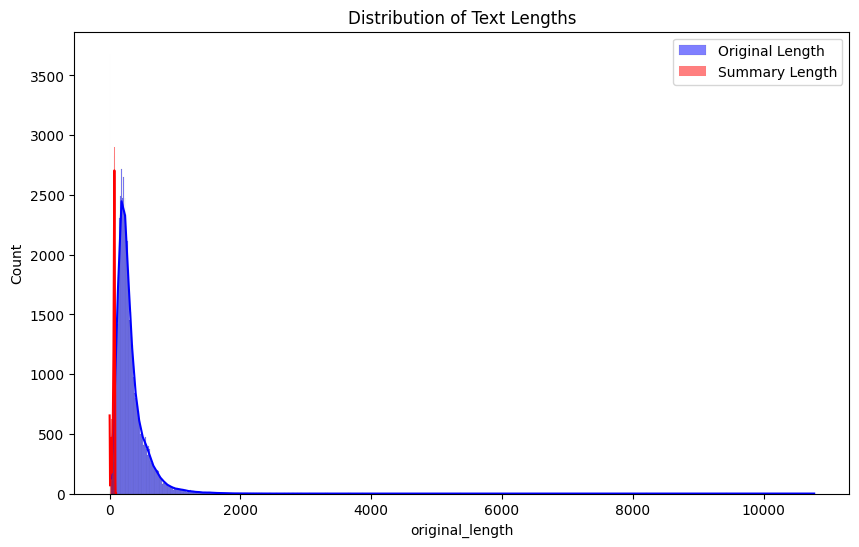

In [10]:
df['original_length'] = df['content'].apply(lambda x: len(x.split()))
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['original_length'], kde=True, color='blue', label='Original Length')
sns.histplot(df['summary_length'], kde=True, color='red', label='Summary Length')
plt.legend()
plt.title('Distribution of Text Lengths')
plt.show()